# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
data = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# print(data.isnull().sum())

In [4]:
# ENcoding categorical variables
label_encoder = LabelEncoder()
data['Geography'] = label_encoder.fit_transform(data['Geography'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])

In [5]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# SPlitting the data into train and test sets
X = data.drop(columns = ['RowNumber', 'CustomerId', 'Surname', 'Exited'])
y = data['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print('Training set shape:', X_train.shape, y_train.shape)
print('Testing set shape:', X_test.shape, y_test.shape)

Training set shape: (8000, 10) (8000,)
Testing set shape: (2000, 10) (2000,)


# EDA(Exploratory Data Analysis)

In [7]:
X_train.describe()  #SUmmary of the numerical features

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,651.647625,0.750125,0.545250,38.897750,5.003875,76102.139645,1.531375,0.703500,0.512750,100431.289764
std,96.366200,0.828416,0.497979,10.518953,2.881822,62461.005757,0.579705,0.456743,0.499869,57518.920431
min,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,90.070000
25%,585.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51364.125000
50%,653.000000,1.000000,1.000000,37.000000,5.000000,96447.520000,1.000000,1.000000,1.000000,100487.720000
75%,719.000000,1.000000,1.000000,44.000000,7.000000,127611.332500,2.000000,1.000000,1.000000,149595.842500
max,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199970.740000


In [8]:
y_train.value_counts()  #The class distribution of the data variable

0    6356
1    1644
Name: Exited, dtype: int64

Data Visualization

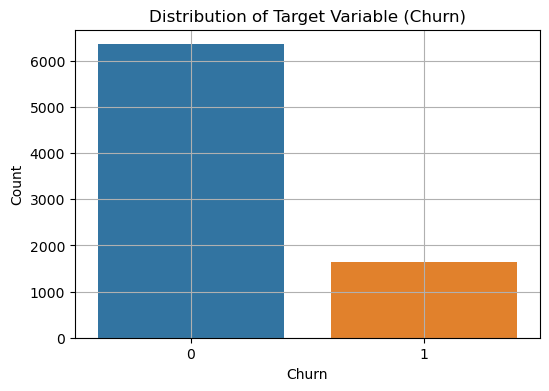

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.figure(figsize = (6, 4))
sns.countplot(x = y_train)
plt.title('Distribution of Target Variable (Churn)')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.grid(True)
plt.show()

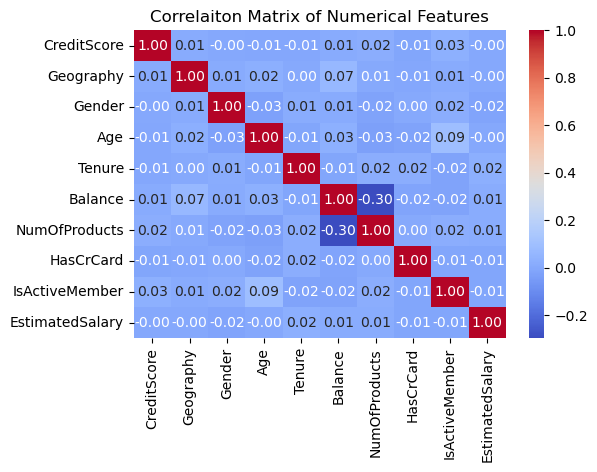

In [10]:
plt.figure(figsize = (6, 4))
sns.heatmap(X_train.corr(), annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Correlaiton Matrix of Numerical Features')
plt.show()

Feature ANalysis

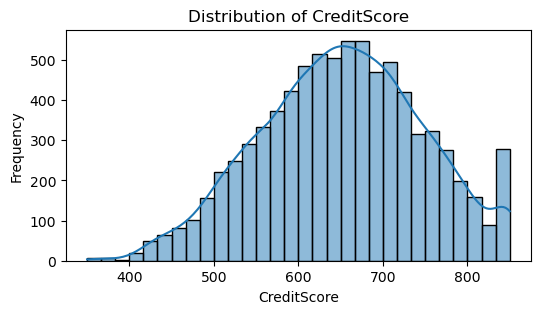

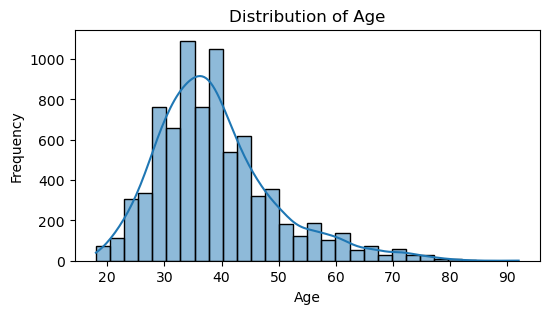

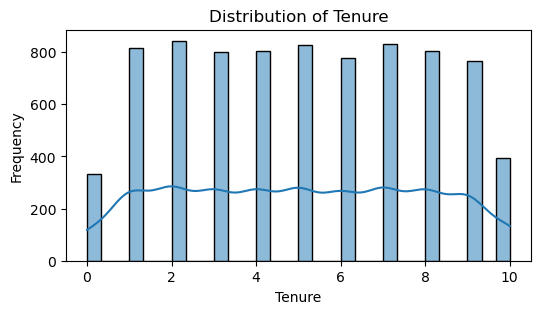

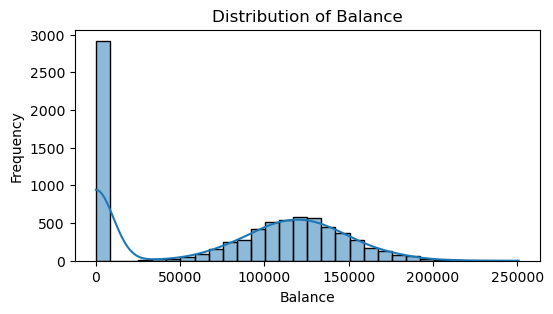

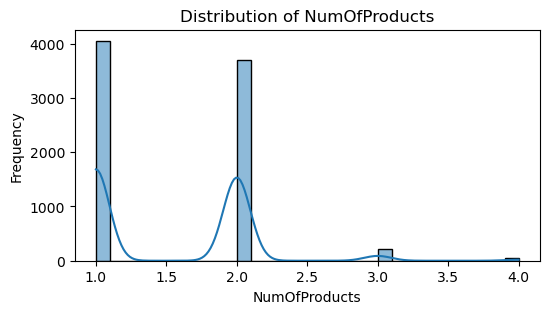

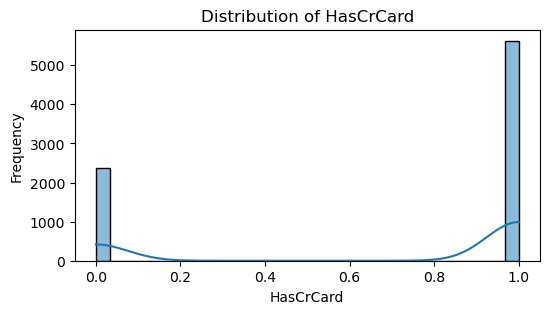

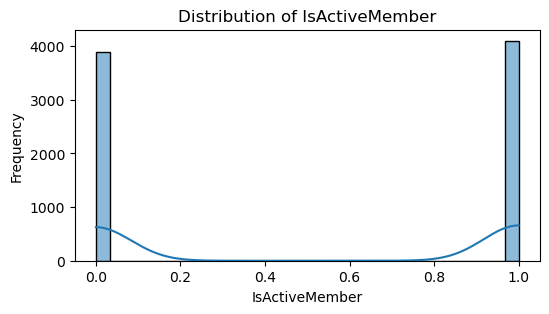

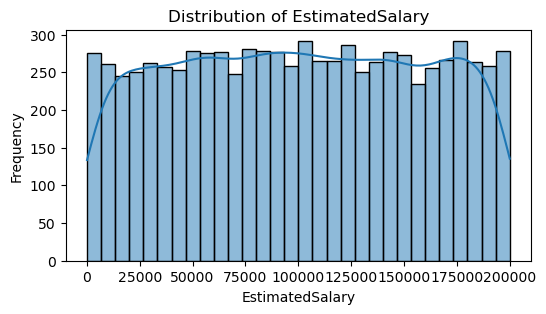

In [11]:
# Visualizing distribution of the numerical features
numerical_features = X_train.select_dtypes(include = ['int64', 'float64']).columns

for feature in numerical_features:
    plt.figure(figsize = (6, 3))
    sns.histplot(data = X_train, x = feature, kde = True, bins = 30)
    plt.title('Distribution of '+ feature)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

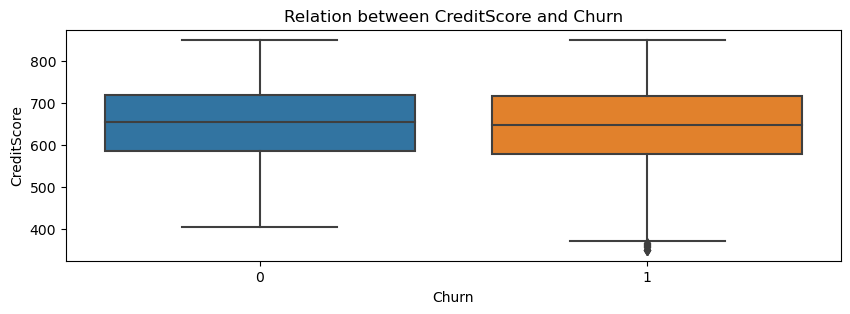

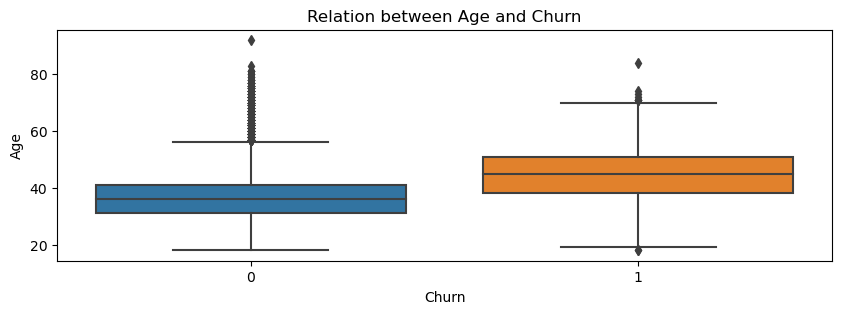

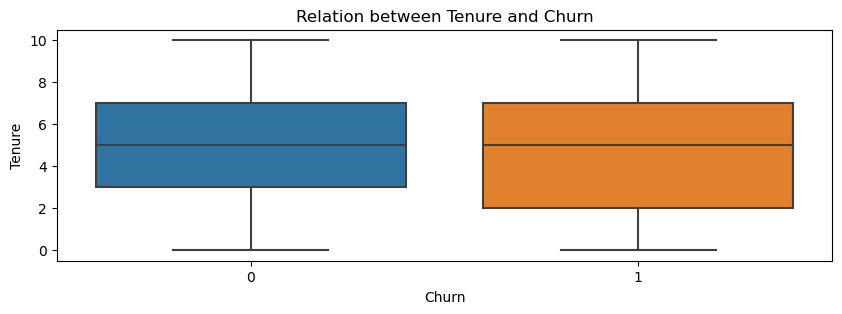

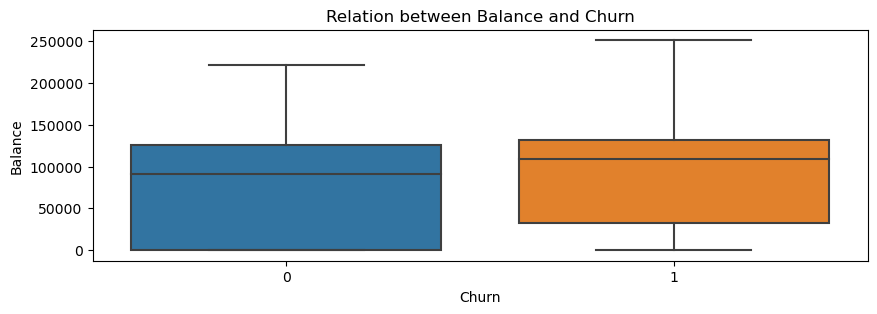

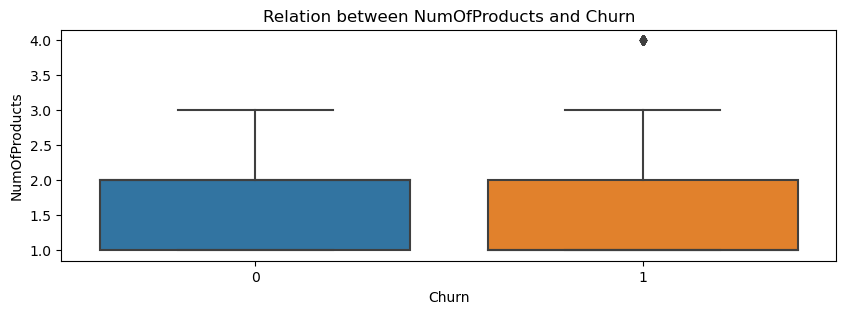

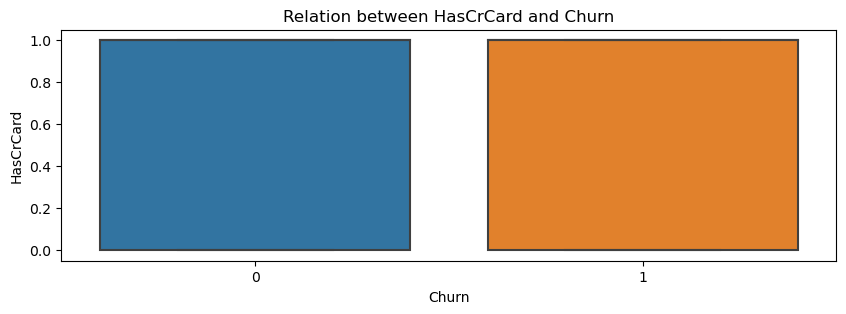

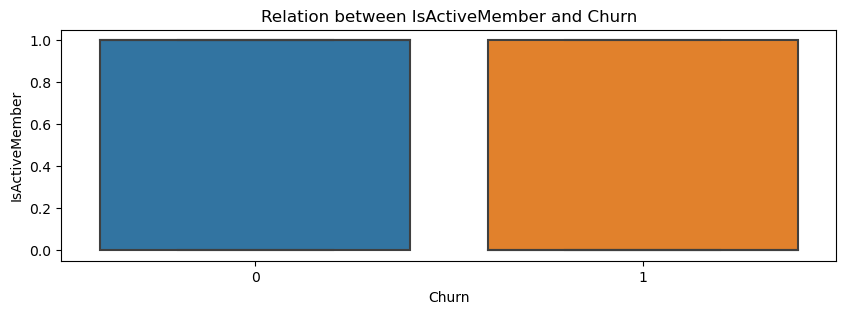

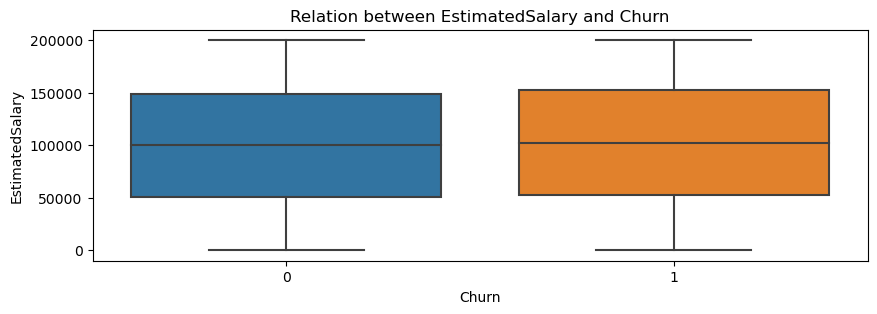

In [12]:
# Visualizing the relationship between the target variable and numerical features
for feature in numerical_features:
    plt.figure(figsize = (10, 3))
    sns.boxplot(x = y_train, y = X_train[feature])
    plt.title('Relation between '+ feature + ' and Churn')
    plt.xlabel('Churn')
    plt.ylabel(feature)
    plt.show()

In [13]:
# Visualizing the relationship between target variable and categorical features
categorical_features = X_train.select_dtypes(include = ['object']).columns

for feature in categorical_features:
    plt.figure(figsize = (6, 3))
    sns.countplot(x = X_train[feature], hue = y_train)
    plt.title('Relationship between '+ feature +' and Churn')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

In [14]:
print(X_train.dtypes)
# This shows that there are no categorical features in the dataset

CreditScore          int64
Geography            int32
Gender               int32
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
dtype: object


# Feature Engineering

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Model Selection and Training

# Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [17]:
model_metrics = {}

In [18]:
lr_model = LogisticRegression(max_iter = 1000)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

In [19]:
# Metrics
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)


In [20]:
print('Logistic Regression Performance Metrics: ')
print("Accuracy:", lr_accuracy)
print("Precision:", lr_precision)
print("Recall:", lr_recall)
print("F1-score:", lr_f1)

Logistic Regression Performance Metrics: 
Accuracy: 0.8155
Precision: 0.6
Recall: 0.183206106870229
F1-score: 0.2807017543859649


# Random Forest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [22]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [23]:
# Calculate metrics
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)

In [24]:
print('Random Forest Classifier Performance Metrics: ')
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1-score:", rf_f1)

Random Forest Classifier Performance Metrics: 
Accuracy: 0.8675
Precision: 0.7644628099173554
Recall: 0.4707379134860051
F1-score: 0.5826771653543307


# Gradient Boosting

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [26]:
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

In [27]:
# Metrics
gb_accuracy = accuracy_score(y_test, gb_pred)
gb_precision = precision_score(y_test, gb_pred)
gb_recall = recall_score(y_test, gb_pred)
gb_f1 = f1_score(y_test, gb_pred)

In [28]:
print("Gradient Boosting Performance Metrics:")
print("Accuracy:", gb_accuracy)
print("Precision:", gb_precision)
print("Recall:", gb_recall)
print("F1-score:", gb_f1)

Gradient Boosting Performance Metrics:
Accuracy: 0.867
Precision: 0.7591836734693878
Recall: 0.4732824427480916
F1-score: 0.5830721003134797


In [29]:
# From the performance metrics, we observe that RFC and GB models are better than LogR (in terms of accuracy and f1_score).
# RF has a slightly higher precision and recall compared to GB.

# Model Tuning

# Random Forest Classifier

In [30]:
from sklearn.model_selection import GridSearchCV

# defining hyperparameter grids
parameter_grid_rf = {
    'n_estimators' : [100, 200, 300],
    'max_depth' : [None, 100, 200],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' : [1, 2, 4]}

In [31]:
# grid search for best hyperparameters
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state = 42), parameter_grid_rf, cv = 3, scoring = 'f1')
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 100, 200],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='f1')

In [32]:
# Best hyperparameters
best_params_rf = grid_search_rf.best_params_
print("Best Hyperparameters for Random Forest:", best_params_rf)

Best Hyperparameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}


In [33]:
# Evaluating the model with best hyperparameters
rf_best = RandomForestClassifier(**best_params_rf, random_state=42)
rf_best.fit(X_train, y_train)
rf_pred_best = rf_best.predict(X_test)

In [34]:
# Metrics
rf_accuracy_best = accuracy_score(y_test, rf_pred_best)
rf_precision_best = precision_score(y_test, rf_pred_best)
rf_recall_best = recall_score(y_test, rf_pred_best)
rf_f1_best = f1_score(y_test, rf_pred_best)

In [35]:
print("Random Forest Performance Metrics after Hyperparameter Tuning:")
print("Accuracy:", rf_accuracy_best)
print("Precision:", rf_precision_best)
print("Recall:", rf_recall_best)
print("F1-score:", rf_f1_best)

Random Forest Performance Metrics after Hyperparameter Tuning:
Accuracy: 0.8645
Precision: 0.7584745762711864
Recall: 0.455470737913486
F1-score: 0.5691573926868044


# Gradient Boosting

In [36]:
# Define hyperparameters grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

In [ ]:
# Grid search for best hyperparameters
grid_search_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, cv=3, scoring='f1')
grid_search_gb.fit(X_train, y_train)

In [ ]:
# Best hyperparameters
best_params_gb = grid_search_gb.best_params_
print("Best Hyperparameters for Gradient Boosting:", best_params_gb)

In [ ]:
# Evaluate the model with best hyperparameters
gb_best = GradientBoostingClassifier(**best_params_gb, random_state=42)
gb_best.fit(X_train, y_train)
gb_pred_best = gb_best.predict(X_test)

In [ ]:
# Metrics
gb_accuracy_best = accuracy_score(y_test, gb_pred_best)
gb_precision_best = precision_score(y_test, gb_pred_best)
gb_recall_best = recall_score(y_test, gb_pred_best)
gb_f1_best = f1_score(y_test, gb_pred_best)

In [ ]:
print("Gradient Boosting Performance Metrics after Hyperparameter Tuning:")
print("Accuracy:", gb_accuracy_best)
print("Precision:", gb_precision_best)
print("Recall:", gb_recall_best)
print("F1-score:", gb_f1_best)

# Model Interpretation

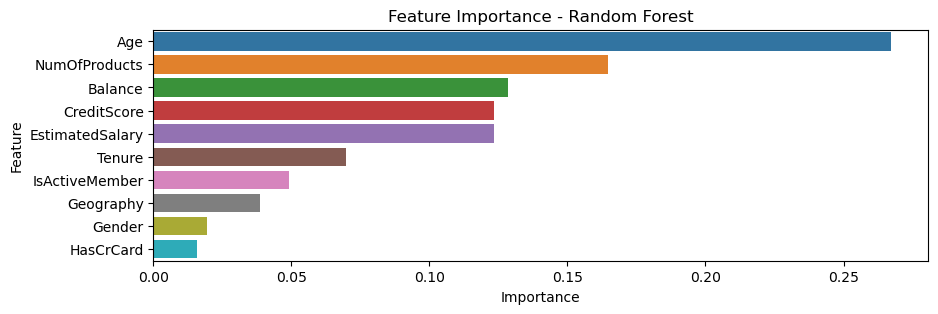

In [45]:
# Feature importance plot for Random Forest
feature_importances = rf_best.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 3))
sns.barplot(x=feature_importances[sorted_indices], y=feature_names[sorted_indices])
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
# I am doing the final model interpretation for the RFC only because i dont have the updated libraries of sklearn for gradient boosting.

# Summary

1. Data Exploration: Explored the dataset to understand its structure, features, and target variable.
2. Data Preprocessing: Performed data preprocessing tasks such as handling missing values, encoding categorical variables, and splitting the data into training and testing sets.
3. Model Selection and Training: Selected three different algorithms (Logistic Regression, Random Forest, Gradient Boosting), trained them on the preprocessed data, and evaluated their performance using various metrics.
4. Model Fine-Tuning: Fine-tuned the hyperparameters of the Random Forest and Gradient Boosting models to improve their performance.
5. Model Interpretation: Interpreted the Random Forest model by analyzing feature importances, which helps in understanding the factors influencing customer churn prediction.

Based on the results obtained, we can choose the best-performing model (in this case, the Random Forest model) for deployment in production to predict customer churn.